In [1]:
%pwd

'b:\\College Projects\\The Real Eye rPPG based deepfake detection system\\Video Deepfake Detection Service\\src'

## Running the preprocessing module

In [3]:

import numpy as np
import os
import cv2

#from rich.traceback import install

# install()



def vid_to_frames_rawframes(video):
    # image_name_video = []
    image_path = '..\\videos'
    # Load the cascade
    face_cascade = cv2.CascadeClassifier('B:\\College Projects\\The Real Eye rPPG based deepfake detection system\\Video Deepfake Detection Service\\src\\haarcascade_frontalface_default.xml')

    for f in [f for f in os.listdir(image_path)]:

        if not(video in f): #OULU
            continue

        carpeta= os.path.join(image_path, f)
        cap = cv2.VideoCapture(carpeta)
        frame_rate = cap.get(cv2.CAP_PROP_FPS)
        nFrames = cap.get(7)
        max_frames = int(nFrames)
        ruta_parcial = os.path.join('../videos/DeepFrames/',f)
        if not(os.path.exists(ruta_parcial)) :
            os.mkdir(ruta_parcial);
        ruta_parcial2 = os.path.join('../videos/RawFrames/',f)
        if not(os.path.exists(ruta_parcial2)) :
            os.mkdir(ruta_parcial2);

        L = 36
        C_R=np.empty((L,L,max_frames))
        C_G=np.empty((L,L,max_frames))
        C_B=np.empty((L,L,max_frames))

        D_R=np.empty((L,L,max_frames))
        D_G=np.empty((L,L,max_frames))
        D_B=np.empty((L,L,max_frames))

        D_R2=np.empty((L,L,max_frames))
        D_G2=np.empty((L,L,max_frames))
        D_B2=np.empty((L,L,max_frames))

        medias_R = np.empty((L,L))
        medias_G = np.empty((L,L))
        medias_B = np.empty((L,L))

        desviaciones_R = np.empty((L,L))
        desviaciones_G = np.empty((L,L))
        desviaciones_B = np.empty((L,L))

        imagen = np.empty((L,L,3))

        medias_CR = np.empty((L,L))
        medias_CG = np.empty((L,L))
        medias_CB = np.empty((L,L))

        desviaciones_CR = np.empty((L,L))
        desviaciones_CG = np.empty((L,L))
        desviaciones_CB = np.empty((L,L))
        ka            = 1


        while(cap.isOpened() and ka< max_frames):
            ret, frame = cap.read()
            gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
            # Detect faces
            faces = face_cascade.detectMultiScale(gray, 1.1, 4)
            #rectangle around the faces
            for (x, y, w, h) in faces:
                # face = cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
                face = frame[y:y + h, x:x + w]


            face = cv2.resize(face, (L,L), interpolation = cv2.INTER_AREA)
            # cv2.imshow('img', face)
            # cv2.waitKey()
            C_R[:,:,ka] = face[:,:,0]
            C_G[:,:,ka] = face[:,:,1]
            C_B[:,:,ka] = face[:,:,2]


            if ka > 1:
                D_R[:,:,ka-1] = ( C_R[:,:,ka] - C_R[:,:,ka-1] ) / ( C_R[:,:,ka] + C_R[:,:,ka-1] );
                D_G[:,:,ka-1] = ( C_G[:,:,ka] - C_G[:,:,ka-1] ) / ( C_G[:,:,ka] + C_G[:,:,ka-1] );
                D_B[:,:,ka-1] = ( C_B[:,:,ka] - C_B[:,:,ka-1] ) / ( C_B[:,:,ka] + C_B[:,:,ka-1] );
            ka = ka+1



        for i in range(0,L):
            for j in range(0,L):
                medias_R[i,j]=np.mean(D_R[i,j,:])
                medias_G[i,j]=np.mean(D_G[i,j,:])
                medias_B[i,j]=np.mean(D_B[i,j,:])
                desviaciones_R[i,j]=np.std(D_R[i,j,:])
                desviaciones_G[i,j]=np.std(D_G[i,j,:])
                desviaciones_B[i,j]=np.std(D_B[i,j,:])

        for i in range(0,L):
            for j in range(0,L):
                medias_CR[i,j]=np.mean(C_R[i,j,:])
                medias_CG[i,j]=np.mean(C_G[i,j,:])
                medias_CB[i,j]=np.mean(C_B[i,j,:])
                desviaciones_CR[i,j]=np.std(C_R[i,j,:])
                desviaciones_CG[i,j]=np.std(C_G[i,j,:])
                desviaciones_CB[i,j]=np.std(C_B[i,j,:])

        for k in range(0,max_frames):
            D_R2[:,:,k] = (C_R[:,:,k] - medias_CR)/(desviaciones_CR+000.1)
            D_G2[:,:,k] = (C_G[:,:,k] - medias_CG)/(desviaciones_CG+000.1)
            D_B2[:,:,k] = (C_B[:,:,k] - medias_CB)/(desviaciones_CB+000.1)



        for k in range(0,max_frames):

            imagen[:,:,0] = D_R2[:,:,k]
            imagen[:,:,1] = D_G2[:,:,k]
            imagen[:,:,2] = D_B2[:,:,k]

            imagen= np.uint8(imagen)

            nombre_salvar= os.path.join(ruta_parcial2,str(k)+'.png')
            cv2.imwrite(nombre_salvar, imagen)


        for k in range(0,max_frames):

            D_R[:,:,k] = (D_R[:,:,k] - medias_R)/(desviaciones_R+000.1)
            D_G[:,:,k] = (D_G[:,:,k] - medias_G)/(desviaciones_G+000.1)
            D_B[:,:,k] = (D_B[:,:,k] - medias_B)/(desviaciones_B+000.1)

        for k in range(0,max_frames):

            imagen[:,:,0] = D_R[:,:,k]
            imagen[:,:,1] = D_G[:,:,k]
            imagen[:,:,2] = D_B[:,:,k]

            imagen= np.uint8(imagen)

            nombre_salvar= os.path.join(ruta_parcial,str(k)+'.png')
            cv2.imwrite(nombre_salvar, imagen)


        cap.release()
        cv2.destroyAllWindows()
    print("Exiting...")


In [4]:
vid_to_frames_rawframes("id0_0001.avi")

Exiting...


## Running the detection Module

In [5]:

import numpy as np
import os
import cv2
from imageio import imread
from skimage.transform import resize
# import tensorflow.keras as keras
import tensorflow as tf
# from tensorflow.keras.models import Model,Sequential,load_model
import pandas as pd
import h5py
import glob
import sys
import scipy.io
import time

#from rich.traceback import install

#install()


def load_test_motion(carpeta):
    X_test = []
    images_names = []
    image_path = carpeta
    print(carpeta)
    print('Read test images')
    for f in [f for f in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, f))]:
        carpeta= os.path.join(image_path, f)
        print(carpeta)
        for imagen in [imagen for imagen in os.listdir(carpeta) if os.path.isfile(os.path.join(carpeta, imagen))]:
            imagenes = os.path.join(carpeta, imagen)
            img = cv2.resize(cv2.imread(imagenes, cv2.IMREAD_COLOR), (36, 36))
            img = img.transpose((-1,0,1))
            X_test.append(img)
            images_names.append(imagenes)
    return X_test, images_names


def load_test_attention(carpeta):
    X_test = []
    images_names = []
    image_path = carpeta
    print('Read test images')
    for f in [f for f in os.listdir(image_path) if os.path.isdir(os.path.join(image_path, f))]:
        carpeta= os.path.join(image_path, f)
        print(carpeta)
        for imagen in [imagen for imagen in os.listdir(carpeta) if os.path.isfile(os.path.join(carpeta, imagen))]:
            imagenes = os.path.join(carpeta, imagen)
            img = cv2.resize(cv2.imread(imagenes, cv2.IMREAD_COLOR), (36, 36))
            img = img.transpose((-1,0,1))
            X_test.append(img)
            images_names.append(imagenes)
    return X_test, images_names

def predict_deepfake():
    image_path = r"B:\\College Projects\\The Real Eye rPPG based deepfake detection system\\Video Deepfake Detection Service\\videos"
    model_path = r"B:\\College Projects\\The Real Eye rPPG based deepfake detection system\\Video Deepfake Detection Service\\pretrained_models\\DeepFakesON-Phys_CelebDF_V2.h5"

    np.set_printoptions(threshold=np.inf)
    data = []
    batch_size = 128
    model = tf.keras.models.load_model(model_path)
    # print(model.summary())
    # input("Press Enter to continue...")

    carpeta_deep= os.path.join(image_path, "DeepFrames\\")
    carpeta_raw= os.path.join(image_path, "RawFrames\\")

    test_data, images_names = load_test_motion(carpeta_deep)
    test_data2, images_names = load_test_attention(carpeta_raw)

    test_data = np.array(test_data, copy=False, dtype=np.float32)
    test_data2 = np.array(test_data2, copy=False, dtype=np.float32)

    predictions = model.predict([test_data, test_data2], batch_size=batch_size, verbose=1)
    bufsize = 1
    nombre_fichero_scores = 'deepfake_scores.txt'
    fichero_scores = open(nombre_fichero_scores,'w',buffering=bufsize)
    fichero_scores.write("img;score\n")
    for i in range(predictions.shape[0]):
        fichero_scores.write("%s" % images_names[i]) #fichero
        if float(predictions[i])<0:
            predictions[i]='0'
        elif float(predictions[i])>1:
            predictions[i]='1'
        fichero_scores.write(";%s\n" % predictions[i]) #scores predichas
        print(images_names[i], predictions[i])

In [6]:
predict_deepfake()



B:\\College Projects\\DeepFakesON-Phys-fork\\videos\DeepFrames\
Read test images
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\DeepFrames\id0_0001.avi
Read test images
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi
3/3 [==============================] - 0s 45ms/step
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi\0.png [0.9868684]
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi\1.png [0.9868684]
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi\10.png [0.9868684]
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi\100.png [0.9868684]
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi\101.png [0.9868684]
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi\102.png [0.0008697]
B:\\College Projects\\DeepFakesON-Phys-fork\\videos\RawFrames\id0_0001.avi\103.png [0.9868684]
B:\\College Projects\\DeepFakesON-Phy

C:\Users\strea\AppData\Local\Temp\ipykernel_14184\2372900508.py:82: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  if float(predictions[i])<0:
C:\Users\strea\AppData\Local\Temp\ipykernel_14184\2372900508.py:84: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  elif float(predictions[i])>1:


## Calculation of average scores

In [ ]:
def calculate_average_scores(filename):
    scores = []

    with open(filename, 'r') as file:
        # Skip the header line
        next(file)

        for line in file:
            # Split the line to extract the score
            parts = line.strip().split(';')
            if len(parts) > 1:
                score_str = parts[1]
                # Convert the score to a float (the score might be in a list format)
                try:
                    # Remove any brackets or unnecessary characters and convert to float
                    score = float(score_str.strip('[]'))
                    scores.append(score)
                except ValueError:
                    print(f"Could not convert score: {score_str}")

    # Calculate the average score
    if scores:
        average_score = sum(scores) / len(scores)
        return average_score
    else:
        return None  # Return None if there are no scores

# Usage
filename = 'deepfake_scores.txt'
average_score = calculate_average_scores(filename)
if average_score is not None:
    print(f"The average score is: {average_score:.6f}")
else:
    print("No scores available to calculate the average.")


## Temporal Integration

In [10]:
def temporal_integration(scores, window_size=5):
    averaged_scores = []
    for i in range(0, len(scores), window_size):
        window = scores[i:i + window_size]
        if window:  # Ensure the window is not empty
            avg_score = sum(window) / len(window)
            averaged_scores.append(avg_score)
    return averaged_scores

# Load scores from the scores.txt file
def load_scores(filename):
    scores = []
    with open(filename, 'r') as file:
        next(file)  # Skip the header if it exists
        for line in file:
            parts = line.strip().split(';')
            if len(parts) > 1:
                score_str = parts[1].strip('[]')
                try:
                    score = float(score_str)
                    scores.append(score)
                except ValueError:
                    print(f"Could not convert score: {score_str}")
    return scores

# Usage
scores = load_scores('deepfake_scores.txt')  # Load scores from the file
averaged_scores = temporal_integration(scores, window_size=1)  # Average scores over 5-frame windows
print("Averaged Scores:", averaged_scores)


Averaged Scores: [0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.0008697, 0.9868684, 0.9868684, 2.0033574e-05, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9535636, 0.9868684, 0.9868684, 0.9868684, 0.02805094, 0.35676175, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9868684, 0.9130921, 0.8249479, 0.97110015, 0.20954005, 0.9794626, 0.7484424, 0.9868684, 0.00015105, 0.03393099, 0.9710499, 0.97105074, 0.7376647, 0.985696, 0.9783151, 0.9782621, 0.9085823, 0.9710439, 0.9868684, 0.97821325, 0.6952199, 0.97826344, 0.9782621, 0.9777346, 1.9392459e-05, 0.00073252, 1.7239491e-06, 0.9868684, 0.95356286, 0.9868684, 7.774248e-09, 0.00172009, 7.652698e-09, 3.8443992e-10, 0.20359664, 5.442681e-10, 1.7600482e-09, 3.8443773e-10, 4.0207224e-09, 3.8443773e-10, 0.9868684, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 3.8443773e-10, 0.9868684, 3.8443773

In [ ]:
def classify_scores(averaged_scores, threshold=0.579):
    classifications = []
    for score in averaged_scores:
        if score > threshold:
            classifications.append("Genuine")  # Score indicates a real frame
        else:
            classifications.append("Deepfake")  # Score indicates a deepfake frame
    return classifications

# Usage
threshold = 0.579  # Define your threshold here
classifications = classify_scores(averaged_scores, threshold)
print("Classifications:", classifications)


In [ ]:
def overall_classification(classifications):
    deepfake_count = classifications.count("Deepfake")
    genuine_count = classifications.count("Genuine")

    if deepfake_count > genuine_count:
        return "Overall Classification: Deepfake"
    else:
        return "Overall Classification: Genuine"

# Usage
overall_result = overall_classification(classifications)
print(overall_result)


In [ ]:
# Load scores from the scores.txt file
scores = load_scores('deepfake_scores.txt')  # Load scores from the file

# Average scores over a set number of frames
averaged_scores = temporal_integration(scores, window_size=1)

# Classify each averaged score
classifications = classify_scores(averaged_scores, threshold=0.579)

# Determine overall classification
overall_result = overall_classification(classifications)
print(overall_result)


## Graph of Results

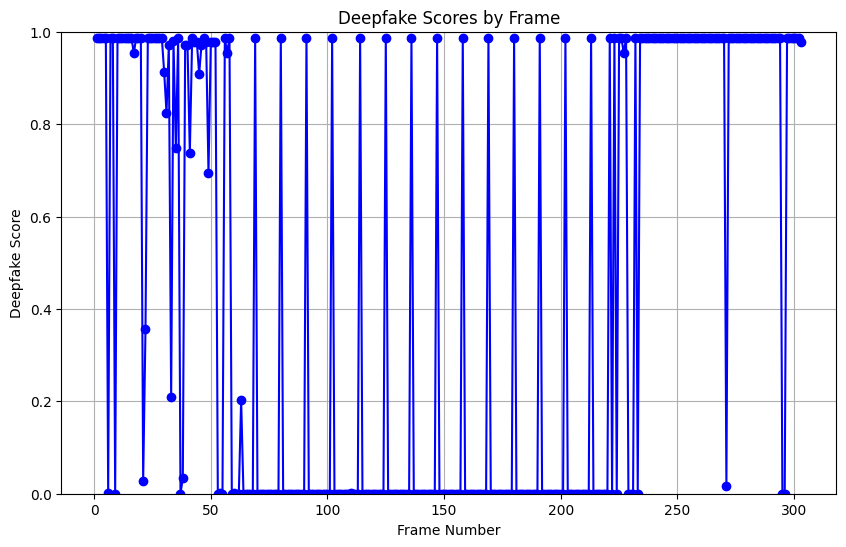

In [11]:
import matplotlib.pyplot as plt

# Function to plot the scores
def plot_scores(averaged_scores):
    # Generate a sequence for frame numbers (x-axis)
    frame_numbers = range(1, len(averaged_scores) + 1)

    # Create a plot
    plt.figure(figsize=(10, 6))
    plt.plot(frame_numbers, averaged_scores, marker='o', linestyle='-', color='b')

    # Add labels and title
    plt.xlabel("Frame Number")
    plt.ylabel("Deepfake Score")
    plt.title("Deepfake Scores by Frame")

    # Set limits for y-axis (0 to 1)
    plt.ylim(0, 1)

    # Add grid for better visualization
    plt.grid(True)

    # Display the plot
    plt.show()

plot_scores(averaged_scores)


## Aggregate DO Results

In [8]:
import os
from collections import defaultdict
import statistics

# Function to process frame scores and classify the entire video
def classify_video_by_frames(file_path, min_score_threshold, ratio_threshold=0.5):
    # Dictionary to store frame scores for each video
    video_scores = defaultdict(list)

    # Read and parse the frame scores from the input file
    with open(file_path, 'r') as file:
        for line in file:
            if "img;score" in line:  # Skip the header line
                continue

            line = line.strip().replace("\\", "/").split(';')
            video_path = os.path.splitext(line[0])[0]
            video_path = video_path.rsplit('.avi', 1)[0]
            video_name = os.path.split(video_path)[-1]  # Extract the video name

            score = float(line[1].strip('[]'))  # Extract the frame score

            # Append the score to the corresponding video entry
            video_scores[video_name].append(score)

    # List to store final classification results
    video_classification = []

    # Process each video's frames and make a final classification
    for video, scores in video_scores.items():
        # Calculate the ratio of frames above the threshold
        frames_above_threshold = sum(1 for score in scores if score > min_score_threshold)
        total_frames = len(scores)
        ratio_above_threshold = frames_above_threshold / total_frames

        # Classify the video based on the ratio of frames above the threshold
        if ratio_above_threshold >= ratio_threshold:
            classification = "Not Deepfake"
        else:
            classification = "Deepfake"

        # Append the result (video name and classification)
        video_classification.append((video, classification))

    return video_classification

# Set parameters
min_score = 0.579  # Threshold for deepfake detection defined in the DOP paper
ratio_threshold = 0.5  # Threshold: 50% of frames must have scores above the threshold
DOP_output_file = 'deepfake_scores.txt'  # Input file with frame scores

# Classify the videos based on aggregated frame scores
classified_videos = classify_video_by_frames(DOP_output_file, min_score, ratio_threshold)

# Output the final classification for each video
for video, classification in classified_videos:
    print(f"Video: {video}, Final Classification: {classification}")


Video: id0_0001, Final Classification: Deepfake
